In [ ]:
# This part explores the effect of picture orientation on model performance

In [ ]:
!pip install timm
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
# Connect to the google conlab
drive.mount('/content/drive')
# Set the dataset path
data_dir = "/content/drive/My Drive/MSc Project/5_Type_Knots_Horizontal"


# Create a label for the original data set and crop it to size 512x512
def create_csv_and_resize_images(data_dir, new_data_dir, csv_file):
    # Create a dictionary to map the knot type to the corresponding integer label
    label_dict = {'Bowline': 0, 'Clove_Hitch': 1, 'Figure_8_Knot': 2, 'Overhand': 3, 'Reef': 4}

    data = []
    if not os.path.exists(new_data_dir):
        os.makedirs(new_data_dir)
    for knot_type in os.listdir(data_dir):
        for light_condition in os.listdir(os.path.join(data_dir, knot_type)):
            for tension_condition in os.listdir(os.path.join(data_dir, knot_type, light_condition)):
                for image_file in os.listdir(os.path.join(data_dir, knot_type, light_condition, tension_condition)):
                    image_path = os.path.join(data_dir, knot_type, light_condition, tension_condition, image_file)
                    image = Image.open(image_path)
                    image = image.resize((512, 512))  # Adjust the image size
                    new_image_dir = os.path.join(new_data_dir, knot_type, light_condition, tension_condition)
                    if not os.path.exists(new_image_dir):
                        os.makedirs(new_image_dir)
                    new_image_path = os.path.join(new_image_dir, image_file)
                    image.save(new_image_path)
                    data.append([image_file, label_dict[knot_type]])  # Use a dictionary to get the corresponding integer label
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    df.to_csv(csv_file, index=False)

new_data_dir = "/content/drive/My Drive/MSc Project/rawdata_Horizontal"  # The new dataset directory
csv_file = "/content/drive/My Drive/MSc Project/rawdata_Horizontal.csv"  # The CSV file directory
create_csv_and_resize_images(data_dir, new_data_dir, csv_file)


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
# Connect to the google conlab
drive.mount('/content/drive')
# Set the dataset path
data_dir = "/content/drive/My Drive/MSc Project/5_Type_Knots_Vertical"


# Create a label for the original data set and crop it to size 512x512
def create_csv_and_resize_images(data_dir, new_data_dir, csv_file):
    # Create a dictionary to map the knot type to the corresponding integer label
    label_dict = {'Bowline': 0, 'Clove_Hitch': 1, 'Figure_8_Knot': 2, 'Overhand': 3, 'Reef': 4}

    data = []
    if not os.path.exists(new_data_dir):
        os.makedirs(new_data_dir)
    for knot_type in os.listdir(data_dir):
        for light_condition in os.listdir(os.path.join(data_dir, knot_type)):
            for tension_condition in os.listdir(os.path.join(data_dir, knot_type, light_condition)):
                for image_file in os.listdir(os.path.join(data_dir, knot_type, light_condition, tension_condition)):
                    image_path = os.path.join(data_dir, knot_type, light_condition, tension_condition, image_file)
                    image = Image.open(image_path)
                    image = image.resize((512, 512))  # Adjust the image size
                    new_image_dir = os.path.join(new_data_dir, knot_type, light_condition, tension_condition)
                    if not os.path.exists(new_image_dir):
                        os.makedirs(new_image_dir)
                    new_image_path = os.path.join(new_image_dir, image_file)
                    image.save(new_image_path)
                    data.append([image_file, label_dict[knot_type]])  # Use a dictionary to get the corresponding integer label
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    df.to_csv(csv_file, index=False)

new_data_dir = "/content/drive/My Drive/MSc Project/rawdata_Vertical"  # The new dataset directory
csv_file = "/content/drive/My Drive/MSc Project/rawdata_Vertical.csv"  # The CSV file directory
create_csv_and_resize_images(data_dir, new_data_dir, csv_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use horizontal data to train ResNet18, ViT and EfficientNet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 1.44686  Acc: 0.38765   F1_Score: 0.36208
val Loss: 1.19876  Acc: 0.54815   F1_Score: 0.52769

Epoch 1/24
----------
train Loss: 0.69514  Acc: 0.77531   F1_Score: 0.77610
val Loss: 0.74336  Acc: 0.71852   F1_Score: 0.68645

Epoch 2/24
----------
train Loss: 0.42195  Acc: 0.88395   F1_Score: 0.88339
val Loss: 0.56460  Acc: 0.81481   F1_Score: 0.80742

Epoch 3/24
----------
train Loss: 0.29544  Acc: 0.93333   F1_Score: 0.93262
val Loss: 0.51495  Acc: 0.83704   F1_Score: 0.82881

Epoch 4/24
----------
train Loss: 0.19511  Acc: 0.95802   F1_Score: 0.95806
val Loss: 0.33829  Acc: 0.88889   F1_Score: 0.88889

Epoch 5/24
----------
train Loss: 0.14896  Acc: 0.97037   F1_Score: 0.97029
val Loss: 0.26090  Acc: 0.91852   F1_Score: 0.91753

Epoch 6/24
----------
train Loss: 0.10151  Acc: 0.98765   F1_Score: 0.98758
val Loss: 0.22887  Acc: 0.94815   F1_Score: 0.94709

Epoch 7/24
----------
train Loss: 0.08553  Acc: 0.98519   F1_Score: 0.98515
val Loss: 0.20719  Ac

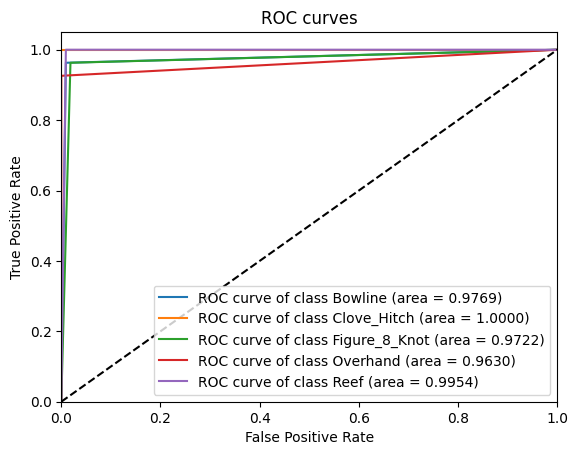

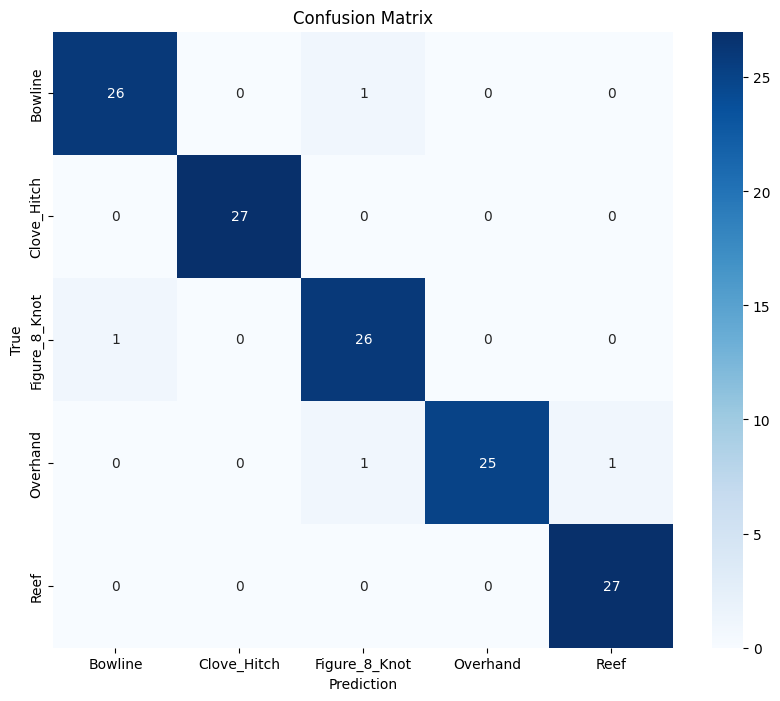

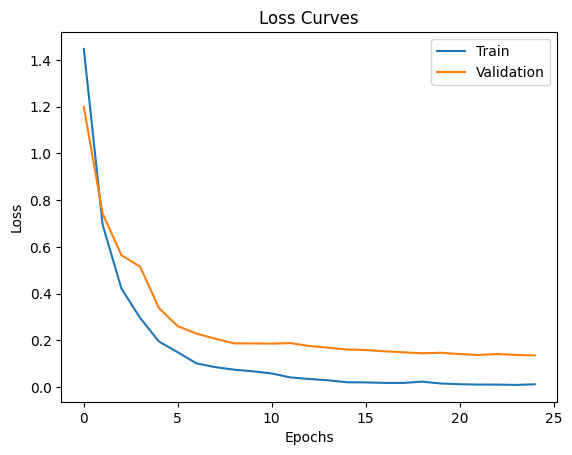

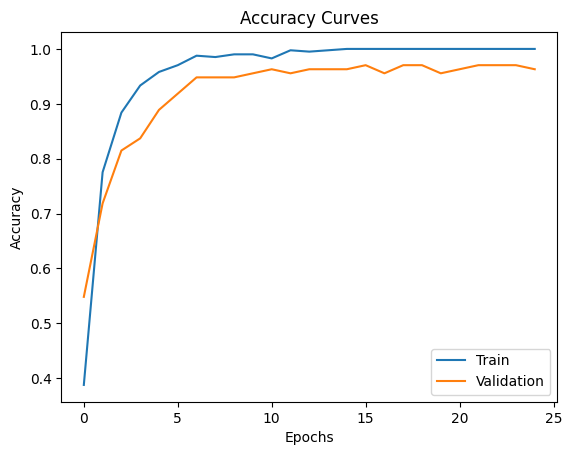

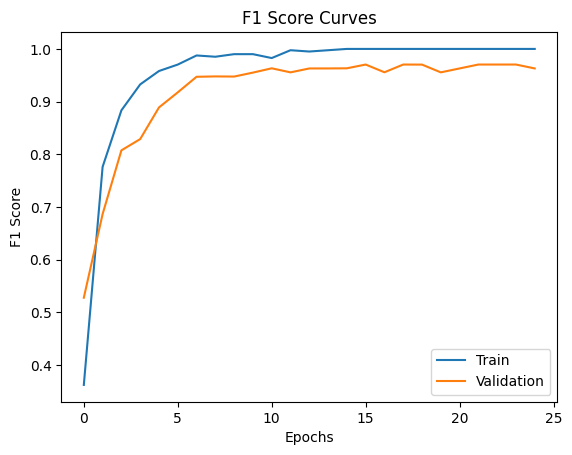

In [ ]:
# ResNet18



import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


best_lr = 0.0000522680011106586
best_optimizer_name = 'RMSprop'
best_weight_decay = 4.962782943199604e-07


# Load a pretrained model(ResNet18)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Change the fc layer to 5
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)








# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1
Epoch 0/24
----------
train Loss: 4.57626  Acc: 0.25679   F1_Score: 0.24628
val Loss: 7.20950  Acc: 0.20000   F1_Score: 0.06667

Epoch 1/24
----------
train Loss: 3.85784  Acc: 0.35309   F1_Score: 0.37454
val Loss: 1.69936  Acc: 0.39259   F1_Score: 0.31062

Epoch 2/24
----------
train Loss: 0.99734  Acc: 0.61728   F1_Score: 0.62581
val Loss: 0.47088  Acc: 0.86667   F1_Score: 0.86517

Epoch 3/24
----------
train Loss: 0.29538  Acc: 0.94815   F1_Score: 0.94744
val Loss: 0.37513  Acc: 0.89630   F1_Score: 0.89160

Epoch 4/24
----------
train Loss: 0.20115  Acc: 0.95556   F1_Score: 0.95474
val Loss: 0.23265  Acc: 0.94815   F1_Score: 0.94850

Epoch 5/24
----------
train Loss: 0.10764  Acc: 0.98519   F1_Score: 0.98505
val Loss: 0.17959  Acc: 0.96296   F1_Score: 0.96303

Epoch 6/24
----------
train Loss: 0.07351  Acc: 0.99012   F1_Score: 0.99006
val Loss: 0.27993  Acc: 0.87407   F1_Score: 0.87959

Epoch 7/24
----------
train Loss: 0.06960  Acc: 0.98025   F1_

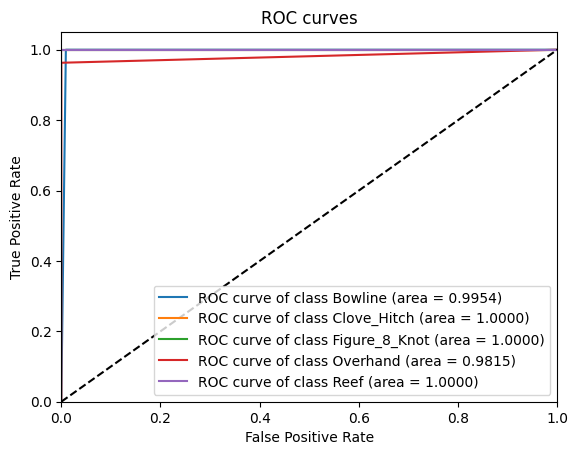

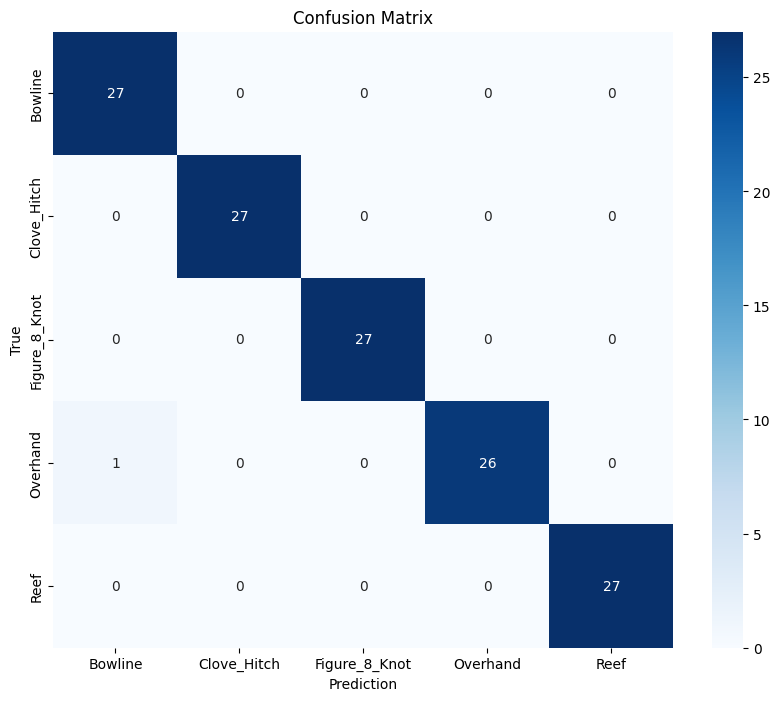

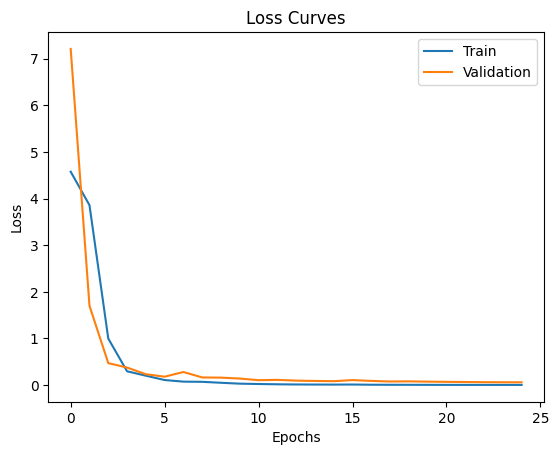

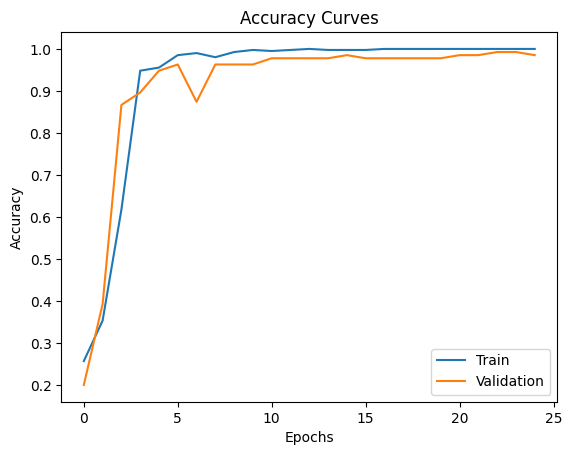

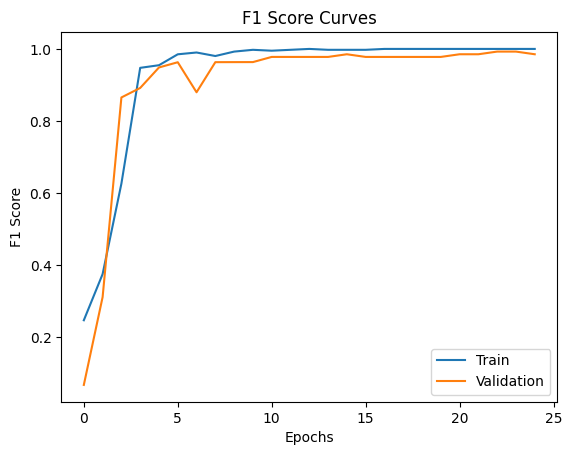

In [ ]:
# Vision Transformers

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            #if phase == 'val' and epoch_acc > best_acc and epoch_acc!=1:
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


# Use the best hyperparameters to train the model
best_lr = 9.0161269711580703e-06
# 1.0161269711580703e-05
best_optimizer_name = 'RMSprop'
best_weight_decay = 0.000597628202891095


# Load a pretrained model(ViT)
model = timm.create_model('vit_large_patch16_224', pretrained=True)
num_ftrs = model.head.in_features
model.head = nn.Linear(num_ftrs, 5)  # Change the head layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)








# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name tf_efficientnet_b5_ns to current tf_efficientnet_b5.ns_jft_in1k.
  model = create_fn(


Epoch 0/24
----------
train Loss: 1.51655  Acc: 0.44691   F1_Score: 0.44434
val Loss: 1.50139  Acc: 0.48889   F1_Score: 0.46441

Epoch 1/24
----------
train Loss: 1.20198  Acc: 0.86667   F1_Score: 0.86579
val Loss: 1.37926  Acc: 0.68148   F1_Score: 0.67972

Epoch 2/24
----------
train Loss: 0.97219  Acc: 0.93580   F1_Score: 0.93533
val Loss: 1.23786  Acc: 0.74815   F1_Score: 0.74248

Epoch 3/24
----------
train Loss: 0.79842  Acc: 0.95309   F1_Score: 0.95289
val Loss: 1.05353  Acc: 0.80741   F1_Score: 0.80408

Epoch 4/24
----------
train Loss: 0.61832  Acc: 0.98025   F1_Score: 0.98014
val Loss: 0.87425  Acc: 0.85185   F1_Score: 0.84250

Epoch 5/24
----------
train Loss: 0.49132  Acc: 0.98765   F1_Score: 0.98759
val Loss: 0.75328  Acc: 0.88889   F1_Score: 0.88513

Epoch 6/24
----------
train Loss: 0.39119  Acc: 0.98765   F1_Score: 0.98754
val Loss: 0.66179  Acc: 0.90370   F1_Score: 0.90088

Epoch 7/24
----------
train Loss: 0.30833  Acc: 0.99753   F1_Score: 0.99753
val Loss: 0.58950  Ac

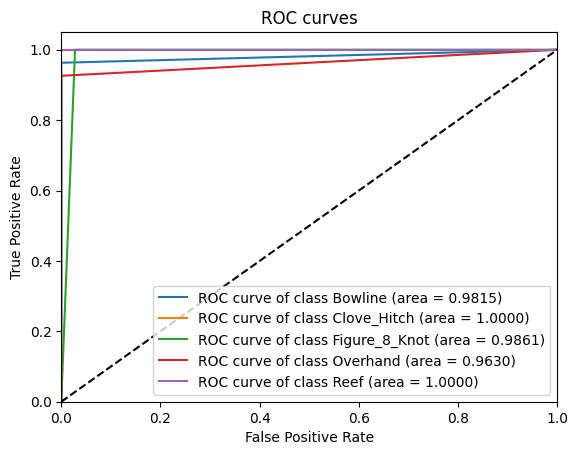

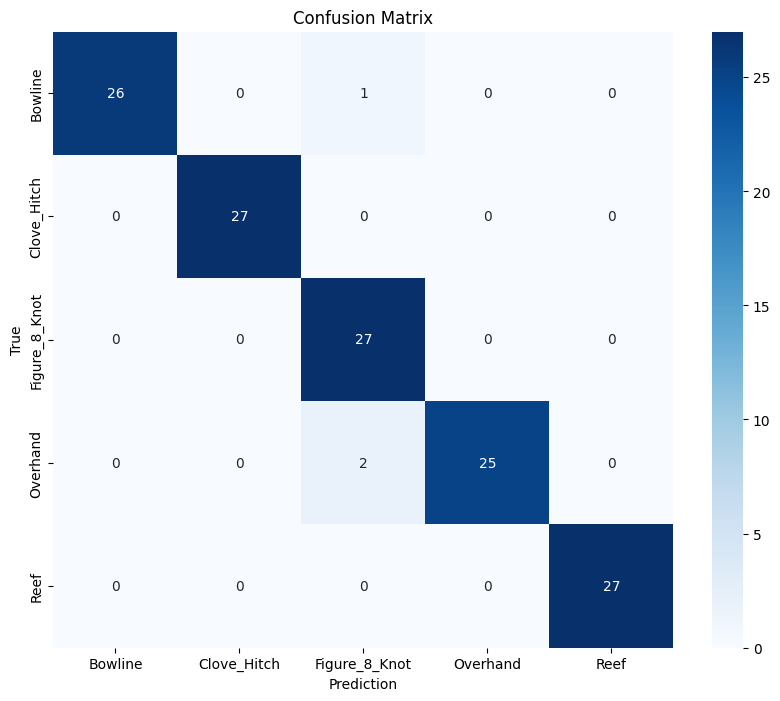

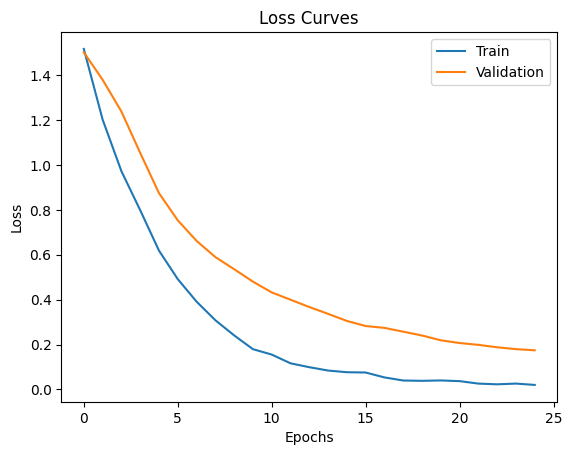

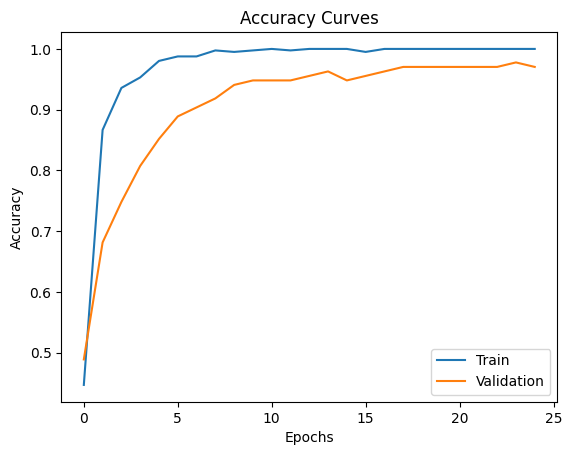

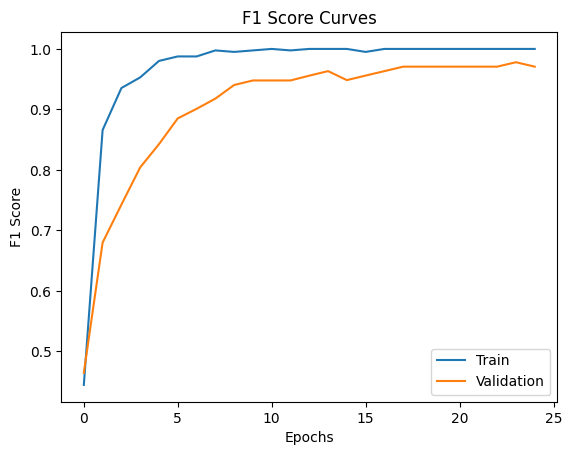

In [ ]:
# EfficientNet

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Horizontal", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


# Use the best hyperparameters to train the model
best_lr = 0.00001305939437836783
best_optimizer_name = 'RMSprop'
best_weight_decay = 2.0510689201040282e-10



# Load a pretrained model(EfficientNet)
model = timm.create_model('tf_efficientnet_b5_ns', pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 5)  # Change the classifier layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
elif best_optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)


# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)









# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
# Use vertical data to train ResNet18, ViT and EfficientNet

This part is to compare the model performance on horizontal images and vertical images.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 1.42085  Acc: 0.40741   F1_Score: 0.40273
val Loss: 1.01638  Acc: 0.52593   F1_Score: 0.51033

Epoch 1/24
----------
train Loss: 0.86609  Acc: 0.64198   F1_Score: 0.63799
val Loss: 0.93232  Acc: 0.61481   F1_Score: 0.60009

Epoch 2/24
----------
train Loss: 0.58338  Acc: 0.76296   F1_Score: 0.75930
val Loss: 0.87957  Acc: 0.65185   F1_Score: 0.63285

Epoch 3/24
----------
train Loss: 0.44173  Acc: 0.83704   F1_Score: 0.83333
val Loss: 0.67232  Acc: 0.73333   F1_Score: 0.72700

Epoch 4/24
----------
train Loss: 0.33214  Acc: 0.89877   F1_Score: 0.89822
val Loss: 0.68606  Acc: 0.73333   F1_Score: 0.73361

Epoch 5/24
----------
train Loss: 0.27241  Acc: 0.92099   F1_Score: 0.92068
val Loss: 0.58420  Acc: 0.80741   F1_Score: 0.80579

Epoch 6/24
----------
train Loss: 0.23194  Acc: 0.93333   F1_Score: 0.93310
val Loss: 0.47610  Acc: 0.85185   F1_Score: 0.85136

Epoch 7/24
----------
train Loss: 0.16473  Acc: 0.96049   F1_Score: 0.96058
val Loss: 0.46561  Ac

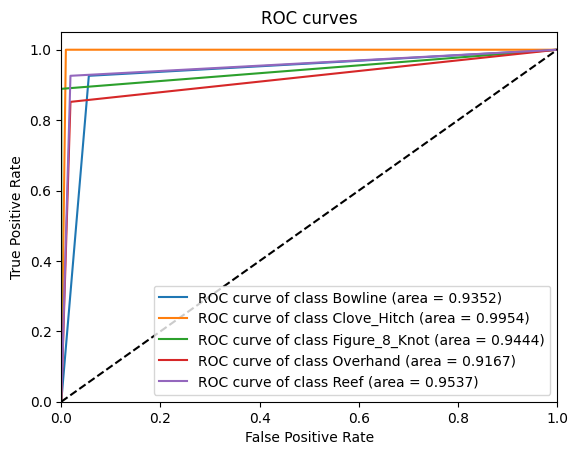

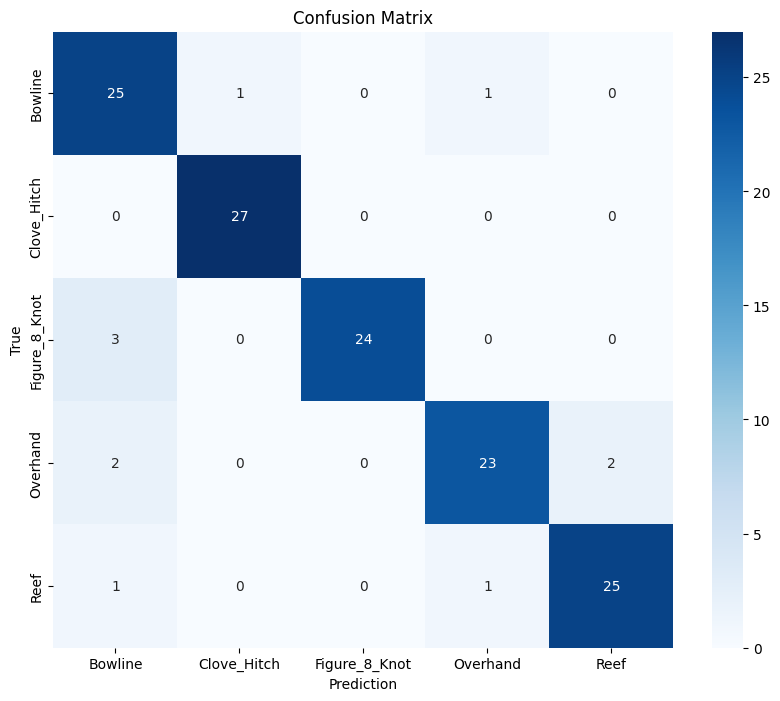

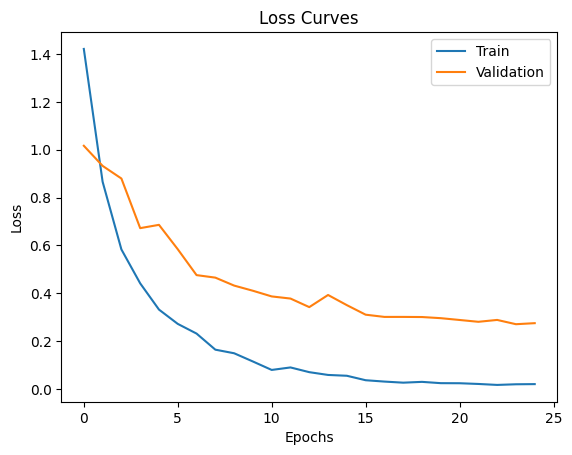

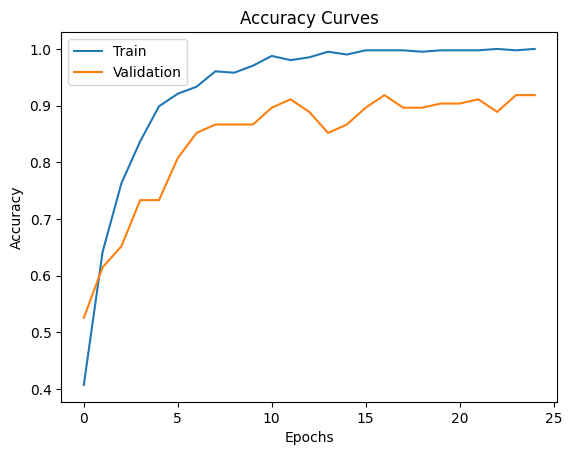

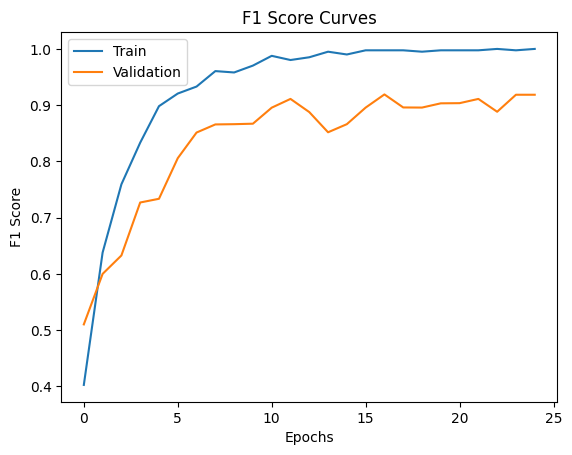

In [ ]:
# ResNet18



import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels


best_lr = 0.0000522680011106586
best_optimizer_name = 'RMSprop'
best_weight_decay = 4.962782943199604e-07


# Load a pretrained model(ResNet18)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Change the fc layer to 5
model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)






# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


Epoch 0/24
----------
train Loss: 6.03922  Acc: 0.19506   F1_Score: 0.17969
val Loss: 4.49561  Acc: 0.34074   F1_Score: 0.20014

Epoch 1/24
----------
train Loss: 2.17465  Acc: 0.47407   F1_Score: 0.45674
val Loss: 1.91816  Acc: 0.37778   F1_Score: 0.30345

Epoch 2/24
----------
train Loss: 1.58683  Acc: 0.49877   F1_Score: 0.50049
val Loss: 0.88040  Acc: 0.66667   F1_Score: 0.67253

Epoch 3/24
----------
train Loss: 0.63513  Acc: 0.77284   F1_Score: 0.77538
val Loss: 0.65007  Acc: 0.74074   F1_Score: 0.73768

Epoch 4/24
----------
train Loss: 0.34232  Acc: 0.88889   F1_Score: 0.88867
val Loss: 0.53412  Acc: 0.78519   F1_Score: 0.78501

Epoch 5/24
----------
train Loss: 0.24669  Acc: 0.94815   F1_Score: 0.94803
val Loss: 0.41864  Acc: 0.89630   F1_Score: 0.89647

Epoch 6/24
----------
train Loss: 0.18309  Acc: 0.96790   F1_Score: 0.96806
val Loss: 0.36152  Acc: 0.91111   F1_Score: 0.91035

Epoch 7/24
----------
train Loss: 0.12308  Acc: 0.98519   F1_Score: 0.98515
val Loss: 0.34180  Ac

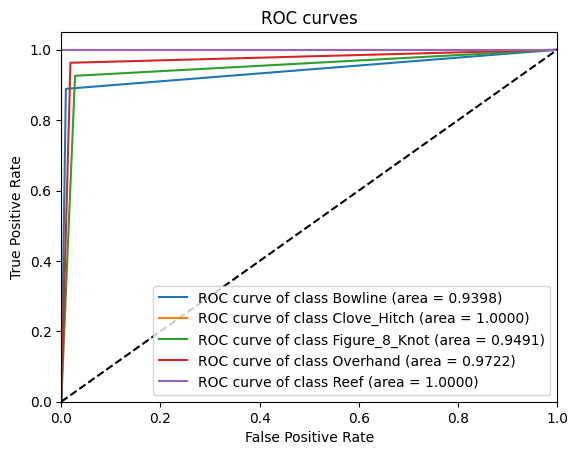

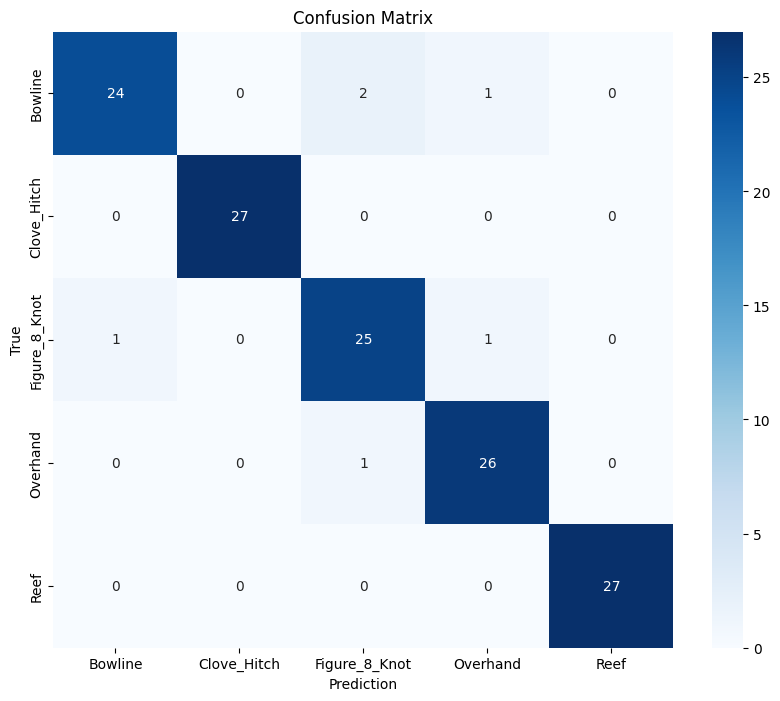

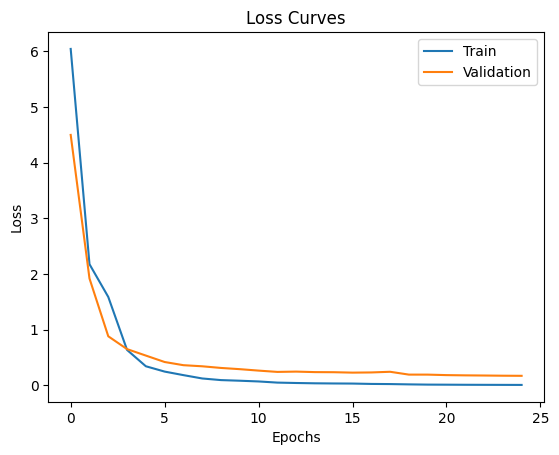

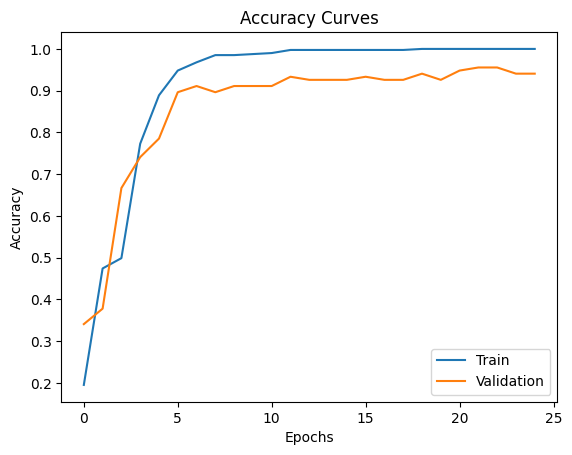

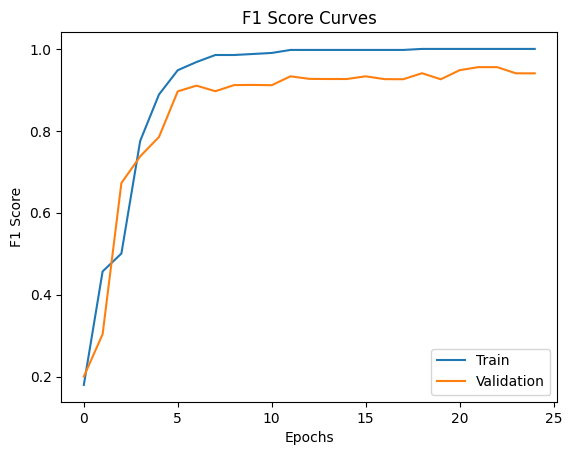

In [ ]:
# Vision Transformers

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
import optuna
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []


def train_model(model, criterion, optimizer, num_epochs=25, accumulation_steps=4):   # Gradient Accumulation to slove the insufficient GPU memory
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' steps
                          optimizer.step()
                          optimizer.zero_grad()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels

# Use the best hyperparameters to train the model
best_lr = 9.0161269711580703e-06
# 1.0161269711580703e-05
best_optimizer_name = 'RMSprop'
best_weight_decay = 0.000597628202891095


# Load a pretrained model(ViT)
model = timm.create_model('vit_large_patch16_224', pretrained=True)
num_ftrs = model.head.in_features
model.head = nn.Linear(num_ftrs, 5)  # Change the head layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)







# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Runing on GPU
CUDA device count:  1


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name tf_efficientnet_b5_ns to current tf_efficientnet_b5.ns_jft_in1k.
  model = create_fn(


Epoch 0/24
----------
train Loss: 1.52971  Acc: 0.36296   F1_Score: 0.34814
val Loss: 1.52566  Acc: 0.38519   F1_Score: 0.36839

Epoch 1/24
----------
train Loss: 1.21940  Acc: 0.82222   F1_Score: 0.82216
val Loss: 1.40794  Acc: 0.57778   F1_Score: 0.56662

Epoch 2/24
----------
train Loss: 1.03413  Acc: 0.91852   F1_Score: 0.91874
val Loss: 1.33211  Acc: 0.62222   F1_Score: 0.59307

Epoch 3/24
----------
train Loss: 0.89704  Acc: 0.94321   F1_Score: 0.94300
val Loss: 1.23557  Acc: 0.64444   F1_Score: 0.63410

Epoch 4/24
----------
train Loss: 0.77389  Acc: 0.96790   F1_Score: 0.96801
val Loss: 1.12049  Acc: 0.71111   F1_Score: 0.70182

Epoch 5/24
----------
train Loss: 0.66655  Acc: 0.97037   F1_Score: 0.97033
val Loss: 1.00684  Acc: 0.76296   F1_Score: 0.75783

Epoch 6/24
----------
train Loss: 0.54680  Acc: 0.98519   F1_Score: 0.98515
val Loss: 0.93761  Acc: 0.77037   F1_Score: 0.76511

Epoch 7/24
----------
train Loss: 0.44818  Acc: 0.99259   F1_Score: 0.99259
val Loss: 0.87543  Ac

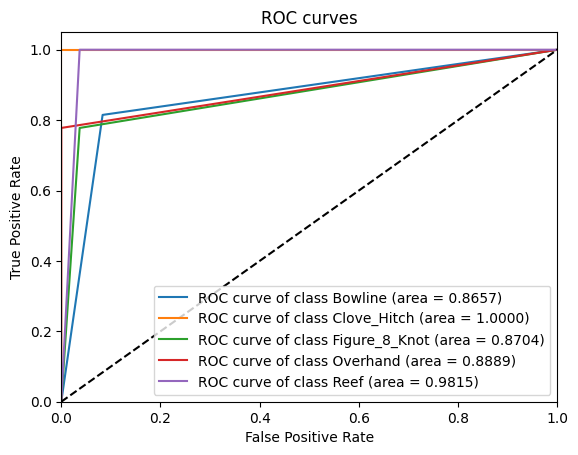

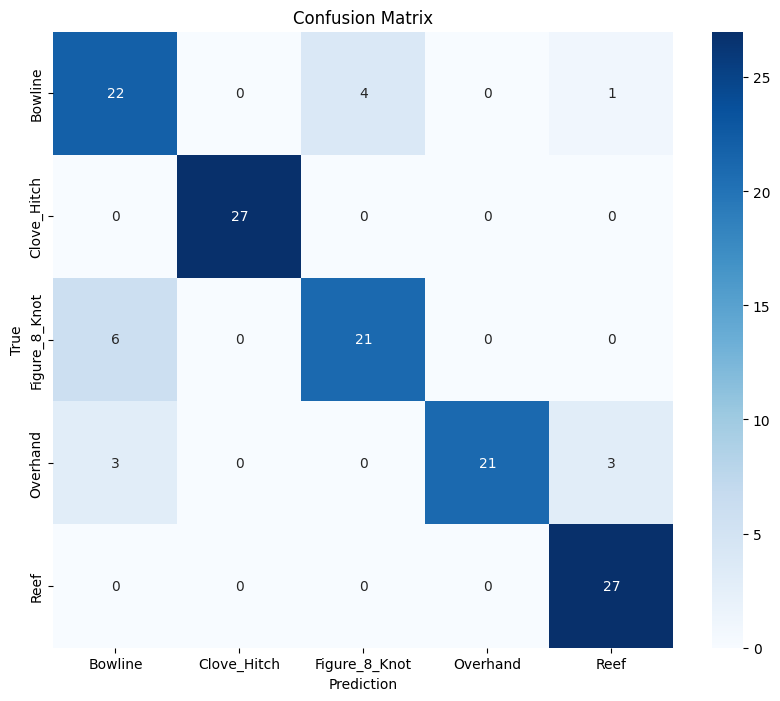

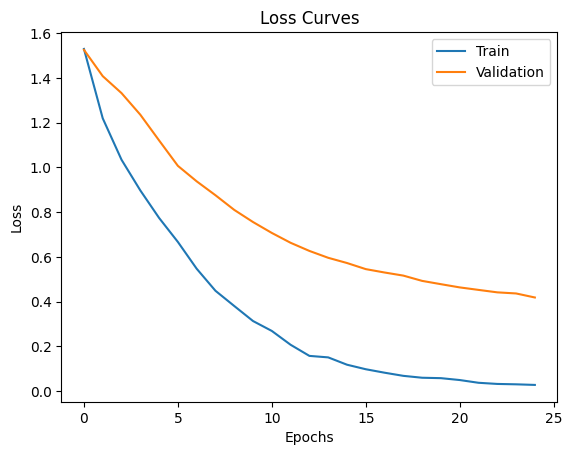

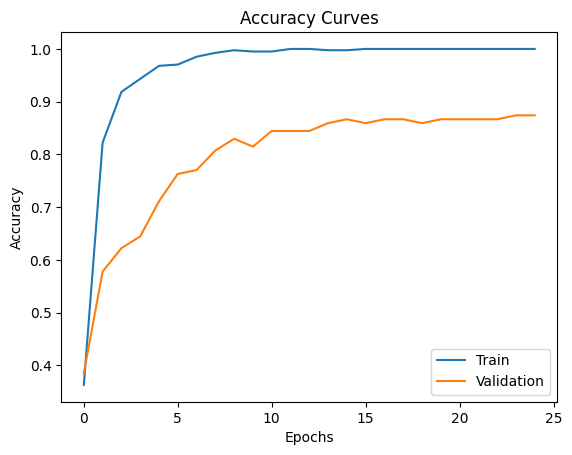

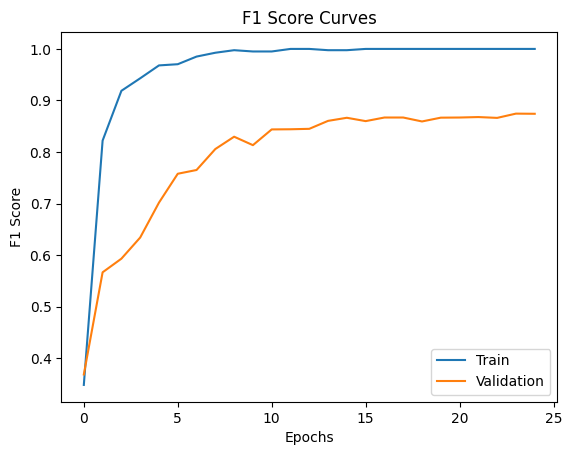

In [ ]:
# EfficientNet

import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import time
import copy
from torch.utils.data import Dataset
from torchvision.io import read_image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import random
import timm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Connect to the google conlab
drive.mount('/content/drive')

# Use transforms to do data augmentation and preprocess
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(45),  # Rotate randomly between 0 and 45 degrees
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly crop and scale to 224x224 size
    transforms.Grayscale(num_output_channels=3),  # Grayscale
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization
])

class Knots_Dataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data = []
        self.labels = []
        self.label_encoder = LabelEncoder()

        # Loop over all conditions
        for knot_type in os.listdir(img_dir):
            for light_condition in os.listdir(os.path.join(img_dir, knot_type)):
                for tension_condition in os.listdir(os.path.join(img_dir, knot_type, light_condition)):
                    images = os.listdir(os.path.join(img_dir, knot_type, light_condition, tension_condition))
                    random.shuffle(images)  # Shuffle the images
                    for image in images:
                        self.data.append(os.path.join(img_dir, knot_type, light_condition, tension_condition, image))
                        self.labels.append(knot_type)

        # Fit the label encoder and transform the labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path)
        image = image.convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Create a custom data set
dataset = Knots_Dataset("/content/drive/My Drive/MSc Project/rawdata_Vertical", transform=data_transforms)

# Split the dataset into training set and validation set
train_dataset = []
val_dataset = []
for i in range(len(dataset)):
    if i % 4 == 0:  # Put 25% of the images in the validation set
        val_dataset.append(dataset[i])
    else:  # Put the rest in the training set
        train_dataset.append(dataset[i])

# Create a Dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

dataloaders = {'train': train_dataloader, 'val': val_dataloader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Check if model can be trained on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Runing on GPU")
    print("CUDA device count: ", torch.cuda.device_count())
else:
    device = torch.device("cpu")
    print("Runing on CPU")

# Save the model results
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_preds = None
    best_labels = None

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_preds = []
            running_labels = []

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero(clean) the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                running_preds.extend(preds.cpu().numpy())
                running_labels.extend(labels.cpu().numpy())

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_acc = epoch_acc.cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)
            epoch_f1_score = f1_score(running_labels, running_preds, average='macro')
            epoch_f1_score = torch.tensor(epoch_f1_score).cpu().numpy()  # Move tensor to CPU and convert to numpy(debug)

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
                train_f1_scores.append(epoch_f1_score)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
                val_f1_scores.append(epoch_f1_score)

            print('{} Loss: {:.5f}  Acc: {:.5f}   F1_Score: {:.5f}'.format(
                phase, epoch_loss, epoch_acc, epoch_f1_score))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_preds = running_preds
                best_labels = running_labels

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, best_preds, best_labels



# Use the best hyperparameters to train the model
best_lr = 0.00001305939437836783
best_optimizer_name = 'RMSprop'
best_weight_decay = 2.0510689201040282e-10



# Load a pretrained model(EfficientNet)
model = timm.create_model('tf_efficientnet_b5_ns', pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 5)  # Change the classifier layer to 5
model = model.to(device)


criterion = nn.CrossEntropyLoss()

# Use the best optimizer
if best_optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
elif best_optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)
else:
    optimizer = optim.RMSprop(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)


# Train and evaluate the best model
model, best_preds, best_labels = train_model(model, criterion, optimizer, num_epochs=25)








# Binarize the labels
best_labels_bin = label_binarize(best_labels, classes=[0, 1, 2, 3, 4])
best_preds_bin = label_binarize(best_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(best_labels_bin[:, i], best_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define class names
class_names = {0: 'Bowline', 1: 'Clove_Hitch', 2: 'Figure_8_Knot', 3: 'Overhand', 4: 'Reef'}

# Plot ROC curves
plt.figure()
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()











# Define knot types
knot_types = ['Bowline', 'Clove_Hitch', 'Figure_8_Knot', 'Overhand', 'Reef']

# Plot confusion matrix
confusion_mtx = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=knot_types, yticklabels=knot_types)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Plot loss curves
plt.figure()
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot F1 Score curves
plt.figure()
plt.plot(train_f1_scores, label='Train')
plt.plot(val_f1_scores, label='Validation')
plt.title('F1 Score Curves')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()